In [ ]:
#instalação de pacotes
!pip install mapclassify
!pip install geopandas
!pip install basedosdados

In [5]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
from shapely import wkt

In [ ]:
query = '''
SELECT
  saeb.sigla_uf,
  saeb.id_escola,
  disciplina,
  ROUND(AVG (proficiencia_saeb * peso_aluno), 2) AS proficiencia_media,
  geometria
FROM `basedosdados.br_inep_saeb.proficiencia` AS saeb
INNER JOIN `basedosdados.br_geobr_mapas.escola` AS geo_escola
ON geo_escola.id_escola = saeb.id_escola
WHERE ano = 2019 AND serie = 9 AND rede IN ('1', '2', '3') AND geo_escola.geometria != 'POINT EMPTY'
GROUP BY sigla_uf, saeb.id_escola, disciplina, geo_escola.geometria
'''

saeb_escola = bd.read_sql(query, billing_project_id='seu-projeto-aqui')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


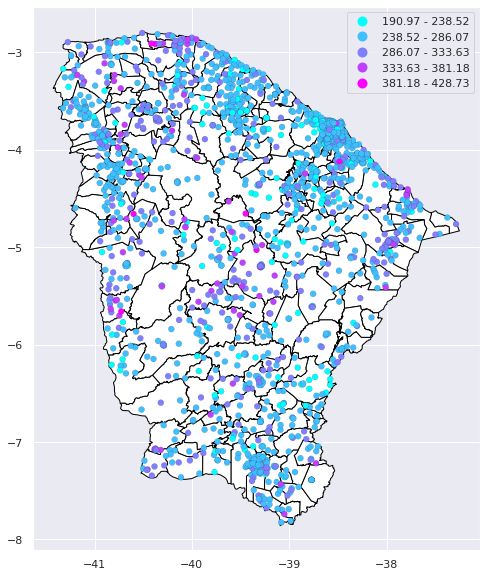

In [22]:
#converte a variável em uma variável geometrica 
df['geometria'] = df['geometria'].apply(wkt.loads)
#transforma em um df do geodataframe
saeb = gpd.GeoDataFrame(df, geometry='geometria')

#cria o mapa fazendo a query pro CE
ax2 = ce.plot(color='white', edgecolor='black', figsize=(15,10)) #ce é um df com a geometria do estado do CE. esses dados vc encontra em https://basedosdados.org/dataset/br-geobr-mapas?bdm_table=municipio
saeb.query('sigla_uf == "CE" & disciplina == "MT"').plot(column='proficiencia_media', ax=ax2, legend=True, cmap='cool', edgecolor='black', linewidth=0.1, scheme='EqualInterval')
ax2.figure.savefig("saeb_geobr.svg", transparent=True, format='svg')